In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = load_svmlight_file("housing_scale.txt")
X_train,X_vali, y_train, y_vali = train_test_split(data[0].todense(),
                                                   data[1],test_size=0.33,
                                                   random_state=100)

In [3]:
bt = np.ones(X_train.shape[0])
X_train = np.c_[X_train,bt]
bv = np.ones(X_vali.shape[0])
X_vali = np.c_[X_vali,bv]
eta = 0.1 #歩长
iters = 100 #迭代次数     
w = np.random.normal(size = (X_train.shape[1]))  #正态分布初始化
G = np.zeros(X_train.shape[1]) 

In [4]:
def linearRegression (X_train, y_train, X_vali, y_vali, w):
    train_loss = np.zeros(iters)
    vali_loss = np.zeros(iters)
    for i in range(iters):
        #Train Loss
        train_loss[i], train_deviation = lossFunc(X_train, y_train, w)
        train_loss[i] = train_loss[i] / train_deviation.shape[0]
        #Validation Loss
        vali_loss[i], vali_deviation = lossFunc(X_vali, y_vali, w)
        vali_loss[i] = vali_loss[i] / vali_deviation.shape[0]
        #Gradient Descent
        G = -np.dot(train_deviation.reshape(1, train_deviation.shape[0]), X_train / X_train.shape[0]) * 2
        w = w - eta * G
    return train_loss, vali_loss

In [5]:
def lossFunc (X, y, w):
    loss = 0
    deviation = y.reshape(y.shape[0], 1) - np.dot(X, w.reshape(X.shape[1], 1))
    for i in range(deviation.shape[0]):
        loss = loss + deviation[i] ** 2
    return loss, deviation

In [6]:
trainLoss, valiLoss = linearRegression (X_train, y_train, X_vali, y_vali, w)

Text(0,0.5,'Loss')

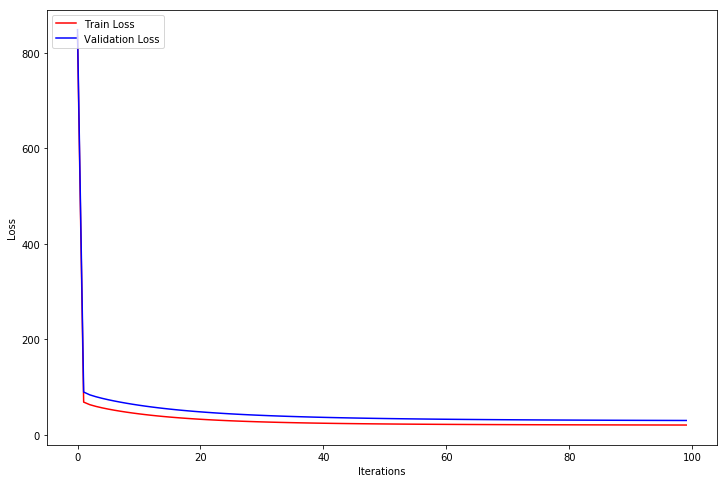

In [7]:
x = np.arange(iters)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, trainLoss.tolist(), 'r', label = 'Train Loss')
ax.plot(x, valiLoss.tolist(), 'b', label = 'Validation Loss')
ax.legend(loc=2)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Loss')  

In [8]:
trainLoss

array([ 836.799503  ,   68.365688  ,   62.94871102,   59.3347964 ,
         56.32803073,   53.70246877,   51.34588657,   49.19901246,
         47.22767941,   45.40989081,   43.72978932,   42.17482342,
         40.73439682,   39.39920762,   38.16090952,   37.01192507,
         35.94533176,   34.95478431,   34.03445586,   33.17898982,
         32.38345858,   31.64332688,   30.95441898,   30.31288884,
         29.71519302,   29.15806589,   28.63849699,   28.1537103 ,
         27.70114529,   27.27843956,   26.88341287,   26.51405256,
         26.16850019,   25.84503925,   25.54208388,   25.25816855,
         24.99193857,   24.74214137,   24.50761847,   24.28729816,
         24.08018873,   23.88537222,   23.70199877,   23.52928128,
         23.36649065,   23.21295127,   23.06803697,   22.9311672 ,
         22.80180358,   22.67944672,   22.56363321,   22.45393298,
         22.34994671,   22.2513036 ,   22.15765918,   22.06869336,
         21.98410864,   21.90362839,   21.82699536,   21.75397

In [9]:
valiLoss

array([ 848.64700096,   89.45422734,   83.54681242,   79.59414023,
         76.26268448,   73.31570456,   70.64055969,   68.17899197,
         65.8979979 ,   63.77654888,   61.79949471,   59.95475833,
         58.23203599,   56.62218417,   55.11691886,   53.70865684,
         52.39042173,   51.15578021,   49.99879288,   48.913973  ,
         47.89624992,   46.94093606,   46.04369663,   45.20052181,
         44.40770117,   43.66180012,   42.95963833,   42.29826977,
         41.6749645 ,   41.08719183,   40.53260492,   40.0090266 ,
         39.51443631,   39.04695812,   38.60484974,   38.18649231,
         37.79038115,   37.41511707,   37.05939855,   36.72201439,
         36.401837  ,   36.09781623,   35.80897366,   35.53439728,
         35.27323672,   35.02469868,   34.78804284,   34.56257803,
         34.34765868,   34.14268159,   33.94708285,   33.76033514,
         33.58194506,   33.41145081,   33.24841996,   33.09244739,
         32.9431534 ,   32.80018199,   32.6631992 ,   32.53189